In [1]:
import IVR_RPCA
import cv2
import matplotlib.pyplot as plt
import os

#### Single Image

(-0.5, 511.5, 511.5, -0.5)

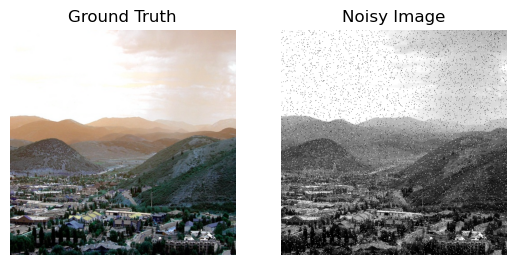

In [2]:
single_image = cv2.imread('Images/noisy_example.jpg', cv2.IMREAD_GRAYSCALE)
ground_truth_single = cv2.imread('Images/ground_example.jpg')

plt.subplot(1, 2, 1)
plt.title('Ground Truth')
plt.imshow(ground_truth_single, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(single_image, cmap='gray')
plt.axis('off')

In [3]:
RPCA = IVR_RPCA.RPCA(single_image)
RPCA.show_shape()

Height: 512
Width: 512


In [4]:
RPCA.fit()

iteration: 1, error: 17.762409925793648
iteration: 300, error: 0.12354863646387987
iteration: 600, error: 0.21692927709580664
iteration: 900, error: 0.12168194366135977
iteration: 1200, error: 0.1223930811651738
iteration: 1500, error: 0.061698151405315
iteration: 1800, error: 0.027018892864036605
iteration: 2100, error: 0.0183583437852759
iteration: 2400, error: 0.009924500682091893
iteration: 2437, error: 0.008657881360599412


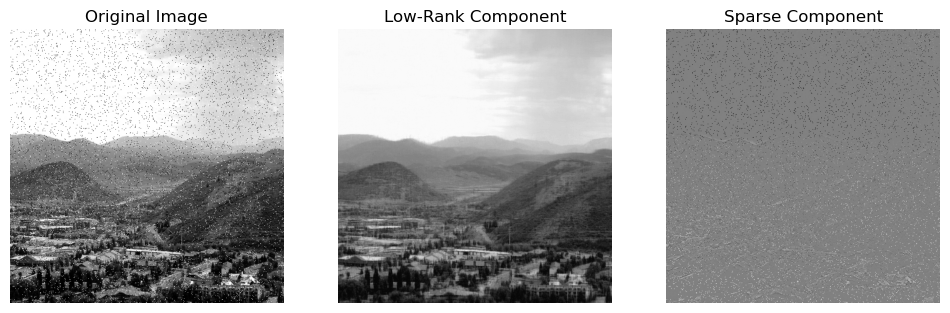

In [5]:
RPCA.display_results()

#### Video

In [3]:
video_dir = 'Videos/Originals'
first_frame_dir = 'Videos/OriginalFirstFrames'

for filename in os.listdir(video_dir):
    video_path = os.path.join(video_dir, filename)
    if filename.endswith('.mp4'):
        print(f"Processing video: {video_path}")
        
        video = cv2.VideoCapture(video_path)
        
        if not video.isOpened():
            print(f"Error opening video file: {video_path}")
            continue
        
        ret, first_frame = video.read()
        if not ret:
            print(f"Error reading the first frame of video: {video_path}")
            video.release()
            continue
        
        first_frame_path = os.path.join(first_frame_dir, f"{os.path.splitext(filename)[0]}_first_frame.jpg")
        cv2.imwrite(first_frame_path, first_frame)
        print(f"First frame saved at: {first_frame_path}")
        
        RPCA = IVR_RPCA.RPCA(cv2.VideoCapture(video_path))
        print('Applying RPCA...')
        RPCA.fit()
        RPCA.display_results()

Processing video: Videos/Originals\VIRAT_S_000200_01_000226_000268.mp4
First frame saved at: Videos/OriginalFirstFrames\VIRAT_S_000200_01_000226_000268_first_frame.jpg
Applying RPCA...
iteration: 1, error: 6.385109151393073
iteration: 2, error: 0.022073320149703157
Processing video: Videos/Originals\VIRAT_S_010000_02_000388_000421.mp4
First frame saved at: Videos/OriginalFirstFrames\VIRAT_S_010000_02_000388_000421_first_frame.jpg
Applying RPCA...
iteration: 1, error: 5.871961546128725
iteration: 2, error: 0.012395379467555721
Processing video: Videos/Originals\VIRAT_S_010116_00_000061_000121.mp4
First frame saved at: Videos/OriginalFirstFrames\VIRAT_S_010116_00_000061_000121_first_frame.jpg
Applying RPCA...
iteration: 1, error: 5.635866080177451
iteration: 2, error: 0.01166461387860798
Processing video: Videos/Originals\VIRAT_S_010200_04_000568_000620.mp4
First frame saved at: Videos/OriginalFirstFrames\VIRAT_S_010200_04_000568_000620_first_frame.jpg
Applying RPCA...
iteration: 1, erro

: 

Parameter Comparison

In [3]:
video_single = 'Videos/Originals/VIRAT_S_050000_05_000696_000732.mp4'
RPCA = IVR_RPCA.RPCA(cv2.VideoCapture(video_single))
print('Applying RPCA...')
RPCA.fit()
RPCA.display_results()

Applying RPCA...
0.00156372213550167
iteration: 1, error: 7.253806363188935
iteration: 2, error: 0.00267907601186239


In [13]:
video_single = 'Videos/Originals/VIRAT_S_050000_05_000696_000732.mp4'
RPCA = IVR_RPCA.RPCA(cv2.VideoCapture(video_single))
print('Applying RPCA...')
RPCA.fit(lambda_val=0.03)
RPCA.display_results()

Applying RPCA...
iteration: 1, error: 28.526716227930788
iteration: 2, error: 0.0010154058422887984


#### Real Time Video

In [8]:
import IVR_RPCA
import cv2
import matplotlib.pyplot as plt

RPCA = IVR_RPCA.RPCA()
RPCA.realtime_rpca(collect_data=True)
times = RPCA.get_times()

Video Capture Opened
0.06922985314887634 0.07635939420086227
0.04393251893266924 0.07374800831742394
0.04199613155509157 0.07163438035940387
0.05050262726598187 0.07006192213000366
0.04879888365302864 0.06888259681873374
0.05278928337078225 0.06798279220284491
0.052037760204121104 0.06747862233921761
0.042997406301500285 0.06546225123173915
0.047284285529002205 0.0643539313886114
0.053412689038972 0.06414559579050669
0.04652842179620223 0.06367675577167735
0.05126623002650933 0.06291059851898163
0.05176410234534214 0.06266092727769493
0.043407822599918884 0.06126555018371144
0.044255798732784624 0.059931607263846734
0.051986823829691914 0.06023770238083968
0.045795176196385394 0.060118101116364675
0.059225929743056654 0.060223664421093885
0.053935978586629234 0.06090286551584531
0.04424557924733807 0.060484127041437234
0.04600404358086452 0.05940409605725041
0.08982469072522109 0.06320142544745368
Object detected
0.06950282449322488 0.06431903504224096
Object detected
0.068117364389126

In [17]:
import plotly.express as px
import pandas as pd

x_values = list(range(1, 31))
y_values_list = [
    [0.5589268207550049, 0.4557318687438965, 0.47833728790283203, 0.4566788673400879, 0.4577651023864746, 0.4522998332977295, 0.49234819412231445, 0.47991085052490234, 0.467374324798584, 0.48389577865600586, 0.47025394439697266, 0.48908019065856934, 0.47626590728759766, 0.4765286445617676, 0.47821617126464844, 0.4685945510864258, 0.4664618968963623, 0.4824087619781494, 0.4811668395996094, 0.4844481945037842, 0.4700899124145508, 0.4790935516357422, 0.4774026870727539, 0.48124146461486816, 0.4750659465789795, 0.4603257179260254, 0.4885246753692627, 0.4859919548034668, 0.47997593879699707, 0.4864785671234131],
    [0.4497263431549072, 0.31066083908081055, 0.31351470947265625, 0.3043043613433838, 0.3000936508178711, 0.30694007873535156, 0.31352829933166504, 0.3162500858306885, 0.3192448616027832, 0.3135566711425781, 0.3178579807281494, 0.31998372077941895, 0.3179962635040283, 0.30780649185180664, 0.32857799530029297, 0.31246280670166016, 0.32175636291503906, 0.3159821033477783, 0.2942643165588379, 0.3192141056060791, 0.3096792697906494, 0.46190500259399414, 0.47395896911621094, 0.4683690071105957, 0.46543264389038086, 0.4547131061553955, 0.45978307723999023, 0.4520225524902344, 0.4633152484893799, 0.4657723903656006],
    [0.535393476486206, 0.5551855564117432, 0.5437088012695312, 0.549964427947998, 0.5666265487670898, 0.520850658416748, 0.5567986965179443, 0.5575730800628662, 0.5571861267089844, 0.5485129356384277, 0.5413618087768555, 0.5725038051605225, 0.5913329124450684, 0.5565509796142578, 0.5434436798095703, 0.5472879409790039, 0.5366437435150146, 0.5612502098083496, 0.5457737445831299, 0.548926591873169, 0.5543792247772217, 0.5495829582214355, 0.5490267276763916, 0.5644686222076416, 0.5429472923278809, 0.5608155727386475, 0.5522956848144531, 0.5557713508605957, 0.5464658737182617, 0.558006763458252],
    [0.4461252689361572, 0.32106685638427734, 0.3345932960510254, 0.3179595470428467, 0.30454325675964355, 0.317185640335083, 0.31861138343811035, 0.3206937313079834, 0.3228166103363037, 0.31223225593566895, 0.3265829086303711, 0.3230159282684326, 0.3101363182067871, 0.31734776496887207, 0.3147716522216797, 0.31689977645874023, 0.4708116054534912, 0.3242194652557373, 0.3220195770263672, 0.32208704948425293, 0.3204202651977539, 0.32520055770874023, 0.3143296241760254, 0.326596736907959, 0.3101038932800293, 0.3203275203704834, 0.3162999153137207, 0.3108861446380615, 0.3219907283782959, 0.3072638511657715]
]

data = {
    'Buffer Number': list(range(1, len(y_values_list[0]) + 1)) * len(y_values_list),
    'Time': sum(y_values_list, []),
    'Type': ['Static'] * len(y_values_list[0]) +
            ['Minimal Dynamic'] * len(y_values_list[0]) +
            ['Static Into Object'] * len(y_values_list[0]) +
            ['Minimal Dynamic Into Object'] * len(y_values_list[0])
}

df = pd.DataFrame(data)

# Create the line chart
fig = px.line(df, x='Buffer Number', y='Time', color='Type', markers=True)

fig.update_layout(
    xaxis_title='Buffer Number',
    yaxis_title='Time',
    width=1000,  # set the width of the figure
    height=600  # set the height of the figure
)
fig.show()